# Simulation Exploration

In this notebook, I will produce successively more complex simulations, starting with a "realistic" *ideal* case, and progressing to different non-ideal cases (i.e. fitting with models that don't match with the simulation) to identify some of the "failure modes" of real data. 

In each case, we first fit with simple ML fitting to check that things are basically working, then we use polychord to do a real round of fitting to identify correlations and Bayesian evidence and all that good stuff.

## Setup

In [1]:
import simulation_exploration_utils as utils
from yabf import run_map
import matplotlib.pyplot as plt
import edges_cal as ec
import edges_io as eio
import edges_analysis as ea
import edges_estimate as ee

from getdist import loadMCSamples, plots
import arviz as az

In [2]:
print("edges-io: ", eio.__version__)
print("edges-cal: ", ec.__version__)
print("edges-analysis: ", ea.__version__)
print("edges-estimate: ", ee.__version__)

edges-io:  2.5.4.dev6+g72be093
edges-cal:  3.4.0
edges-analysis:  2.1.1
edges-estimate:  1.0.0


## Default Case: Ideal Realistic Simulation

With the above functions, we easily simulate a "realistic" ideal case for the calibration, which takes its values from a calibration observation (both mean and variance). For the data, we note that Alan's data has assumed constant variance, at a level of 8.4e-11 (for $Q$).

In [3]:
lk_ideal = utils.get_likelihood(utils.fid_labcal, seed=1234)

In [4]:
ideal_fit = run_map(lk_ideal.partial_linear_model)

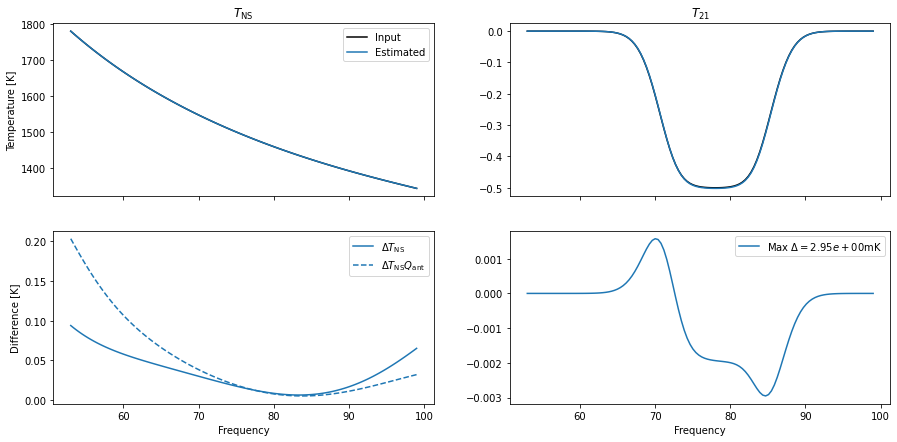

In [5]:
utils.view_results(lk_ideal, ideal_fit );

Looks like our solutions are pretty neat. Now to run them through actual MCMC.

In [4]:
samples = loadMCSamples('./PartialLinearModel')

In [5]:
g = plots.get_subplot_plotter()
g.triangle_plot(
    samples,filled=True, markers={p.name: p.fiducial for p in lk_ideal.partial_linear_model.child_active_params}
)
g.export("default_simulation_corner.png")

In [9]:
azdata_default = az.convert_to_inference_data({name: samples.samples[:, i] for i, name in enumerate(lk_ideal.partial_linear_model.child_active_params.keys())})

/home/smurray/miniconda3/envs/edges/lib/python3.9/site-packages/arviz/plots/pairplot.py:223: UserWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or `sample_stats_prior` or set divergences=False
  warnings.warn(
/home/smurray/miniconda3/envs/edges/lib/python3.9/site-packages/arviz/plots/backends/matplotlib/pairplot.py:238: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


array([[<AxesSubplot:ylabel='t_lns_1'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='t_lns_2'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='t_lns_3'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='t_lns_4'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='t_lns_5'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='A'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubp

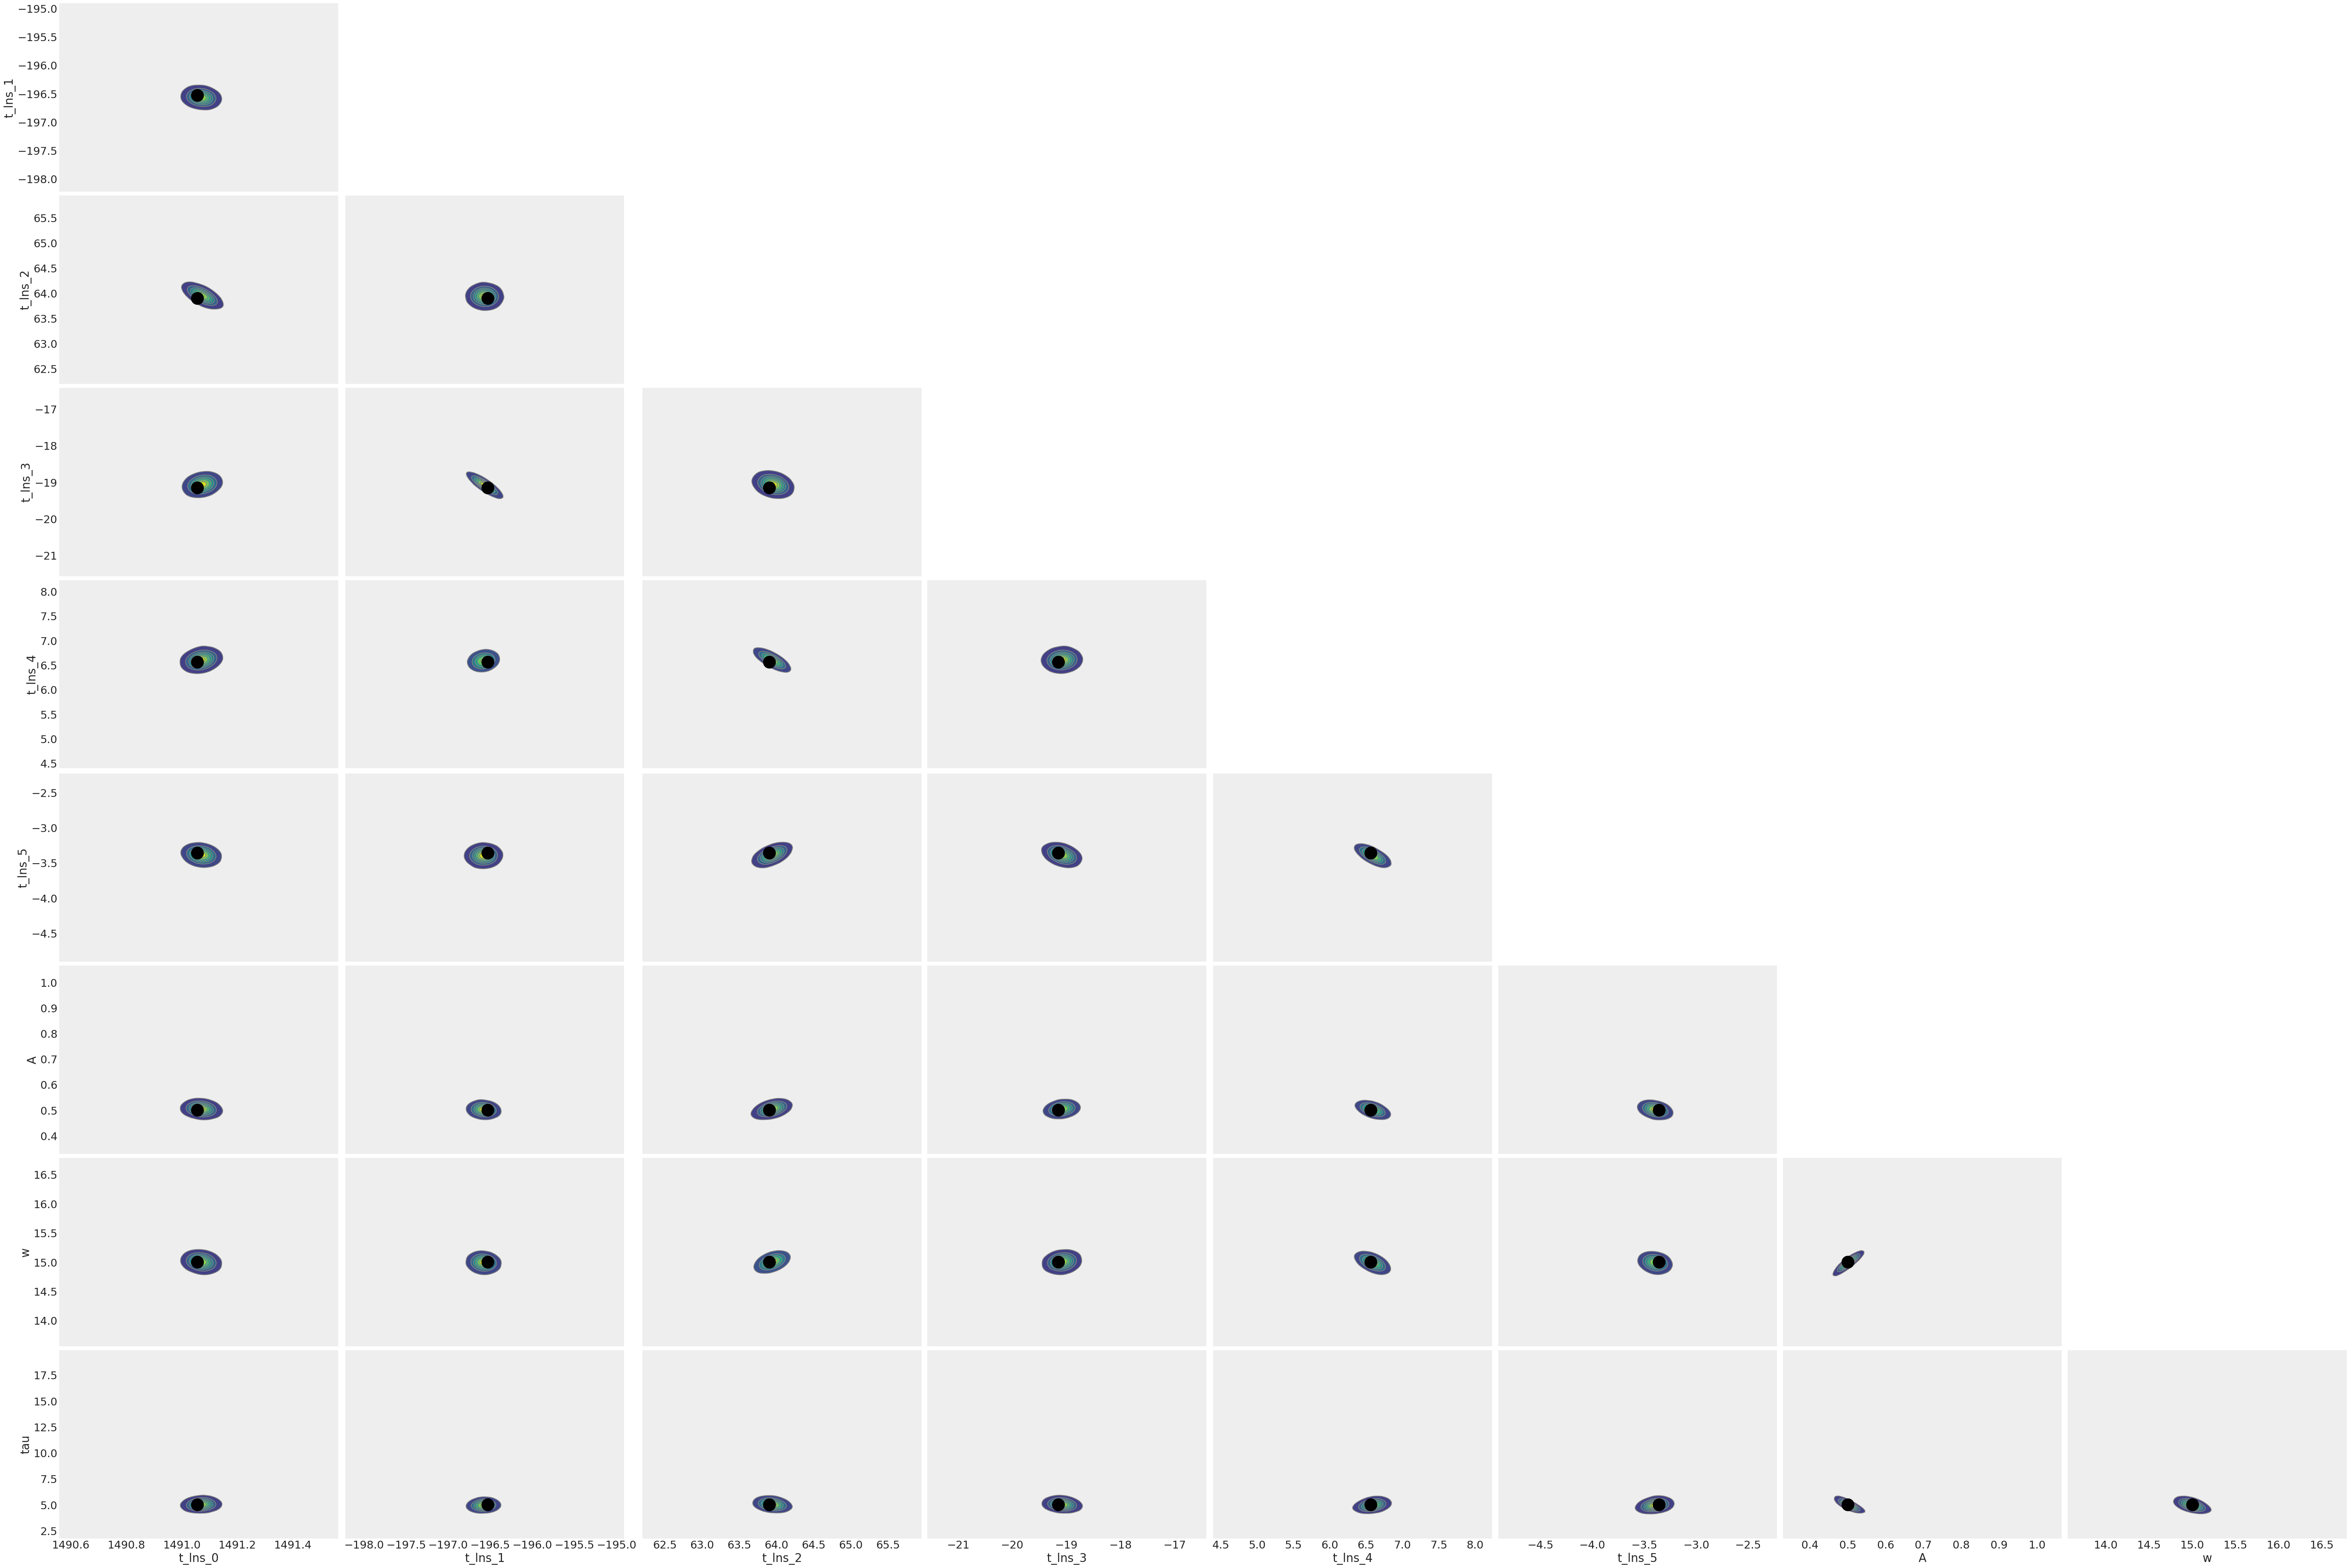

In [10]:
az.style.use("arviz-darkgrid")

az.plot_pair(
    azdata_default,
    var_names=[p.name for p in lk_ideal.partial_linear_model.child_active_params],
    kind="kde",
    divergences=True,
    textsize=22,
    reference_values={p.name: p.fiducial for p in lk_ideal.partial_linear_model.child_active_params},
    reference_values_kwargs={'markersize': 25, 'color': 'k'}
)